<a href="https://colab.research.google.com/github/omarcevi/ML-Projects/blob/main/Used_car_price_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from keras.api._v2.keras.layers import Normalization, Dense, InputLayer
from keras.api._v2.keras.losses import MeanSquaredError

In [2]:
df = pd.read_csv('/content/train.csv', sep=',')
df.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v.id           1000 non-null   int64  
 1   on road old    1000 non-null   int64  
 2   on road now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   condition      1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current price  1000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


In [4]:
print(df.columns.tolist())

['v.id', 'on road old', 'on road now', 'years', 'km', 'rating', 'condition', 'economy', 'top speed', 'hp', 'torque', 'current price']


In [ ]:
sns.pairplot(df[['years', 'km', 'rating', 'condition', 'economy', 'top speed', 'hp', 'torque', 'current price']], diag_kind='kde')

In [5]:
tensor_data = tf.constant(df)
tensor_data = tf.cast(tensor_data, tf.float64)
print(tensor_data)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float64)


In [6]:
tensor_data.shape

TensorShape([1000, 12])

In [7]:
tensor_data = tf.random.shuffle(tensor_data, seed=42)

In [8]:
X = tensor_data[:, 3:-1]
print(X.shape)

(1000, 8)


In [9]:
y = tensor_data[:, -1]
y = tf.expand_dims(y, axis=-1)
print(y.shape)

(1000, 1)


In [10]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)

In [11]:
X_train = X[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train = y[:int(DATASET_SIZE*TRAIN_RATIO)]
print(X_train.shape)
print(y_train.shape)

(800, 8)
(800, 1)


In [12]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [13]:
for x_sample, y_sample in train_dataset:
    print(x_sample, y_sample)
    break

tf.Tensor(
[[2.00000e+00 1.38955e+05 2.00000e+00 2.00000e+00 1.40000e+01 1.81000e+02
  1.06000e+02 1.18000e+02]
 [5.00000e+00 7.80250e+04 1.00000e+00 9.00000e+00 1.50000e+01 1.71000e+02
  9.40000e+01 1.32000e+02]
 [6.00000e+00 1.06261e+05 2.00000e+00 9.00000e+00 1.30000e+01 1.57000e+02
  7.20000e+01 9.20000e+01]
 [3.00000e+00 5.21560e+04 4.00000e+00 7.00000e+00 1.30000e+01 1.43000e+02
  1.18000e+02 9.00000e+01]
 [2.00000e+00 1.18682e+05 1.00000e+00 1.00000e+00 1.50000e+01 1.67000e+02
  8.30000e+01 9.50000e+01]
 [4.00000e+00 8.33700e+04 2.00000e+00 9.00000e+00 1.40000e+01 1.61000e+02
  1.01000e+02 1.20000e+02]
 [6.00000e+00 8.81840e+04 4.00000e+00 7.00000e+00 1.40000e+01 1.41000e+02
  8.10000e+01 1.13000e+02]
 [7.00000e+00 1.24272e+05 2.00000e+00 3.00000e+00 1.30000e+01 1.46000e+02
  6.90000e+01 1.19000e+02]
 [4.00000e+00 7.71960e+04 3.00000e+00 4.00000e+00 1.40000e+01 1.55000e+02
  8.50000e+01 9.50000e+01]
 [5.00000e+00 6.60280e+04 5.00000e+00 9.00000e+00 1.20000e+01 1.77000e+02
  5.70

In [14]:
X_val = X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
y_val = y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
print(X_val.shape)
print(y_val.shape)

(100, 8)
(100, 1)


In [15]:
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)


In [16]:
X_test = X[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
y_test = y[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
print(X_test.shape)
print(y_test.shape)

(100, 8)
(100, 1)


In [19]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [20]:
normalizer = Normalization()
normalizer.adapt(X_train)
normalizer(X)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[-0.9094141 , -1.6599904 ,  0.7350792 ,  0.5144041 ,  0.5948634 ,
        -1.234589  ,  1.630573  , -0.65144074],
       [ 0.8214295 ,  0.20410237, -0.6992209 ,  1.228854  ,  0.5948634 ,
        -0.50931257, -0.61571425, -0.5565391 ],
       [ 1.3983773 , -0.7071171 ,  0.01792916, -1.6289455 ,  0.5948634 ,
        -0.4575071 ,  1.2399144 ,  1.626198  ],
       [-1.486362  ,  0.63204616, -1.4163709 , -1.6289455 ,  1.4970238 ,
         0.00874201, -0.07855862, -0.4141867 ],
       [ 0.8214295 ,  1.6332229 ,  0.01792916, -1.6289455 , -0.7583771 ,
        -0.4575071 ,  1.6794053 , -0.79379314]], dtype=float32)>

In [21]:
model = tf.keras.Sequential([
    InputLayer(input_shape = (8,)),
    normalizer,
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 8)                17        
 n)                                                              
                                                                 
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 34,322
Trainable params: 34,305
Non-trainable params: 17
___________________________________________________

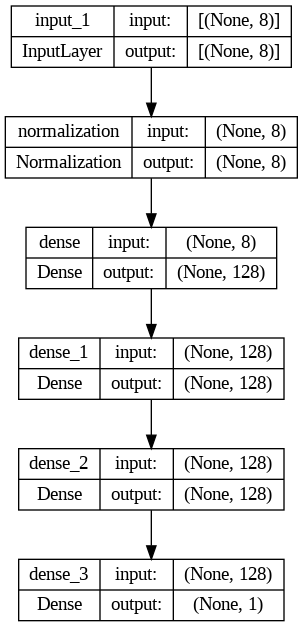

In [22]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True) # Save Graph of model to file

In [23]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1) ,
    loss=tf.keras.losses.MeanAbsoluteError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError()],
    )

In [24]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs=100, verbose=1)

Epoch 1/100
25/25 [==============================] - 3s 13ms/step - loss: 155541.3125 - root_mean_squared_error: 206298.9062 - val_loss: 69785.9297 - val_root_mean_squared_error: 82906.8594
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 51260.5352 - root_mean_squared_error: 64238.4844 - val_loss: 56360.3164 - val_root_mean_squared_error: 67978.1016
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 50551.0039 - root_mean_squared_error: 63747.6328 - val_loss: 55517.5117 - val_root_mean_squared_error: 67330.9609
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 54937.5469 - root_mean_squared_error: 68303.9688 - val_loss: 61086.8789 - val_root_mean_squared_error: 77518.0391
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 47179.0000 - root_mean_squared_error: 58205.9062 - val_loss: 46125.7266 - val_root_mean_squared_error: 56786.3008
Epoch 6/100
25/25 [==============================] - 0s 4ms/st

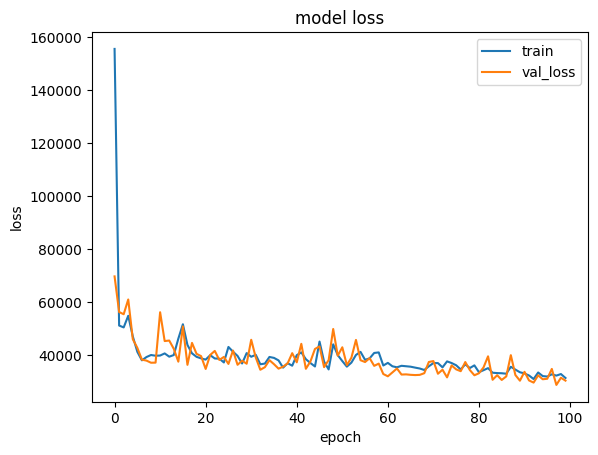

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'])
plt.show()

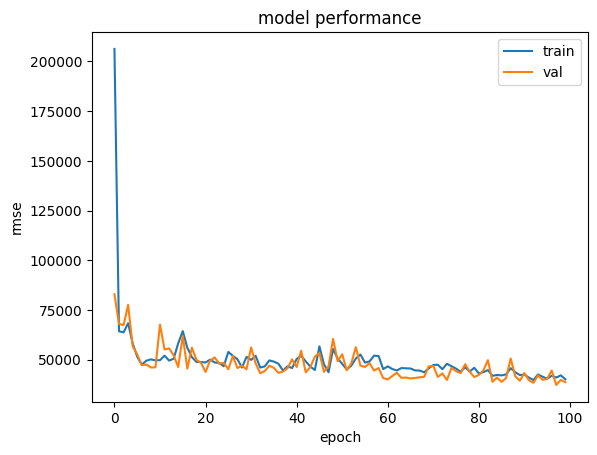

In [26]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model performance')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

In [27]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 5ms/step - loss: 36205.3242 - root_mean_squared_error: 46589.9805


[36205.32421875, 46589.98046875]

In [28]:
model.predict(tf.expand_dims(X_test[0], axis = 0 ))

1/1 [==============================] - 0s 86ms/step


array([[248641.86]], dtype=float32)

In [29]:
y_test[0]

<tf.Tensor: shape=(1,), dtype=float64, numpy=array([260231.])>

In [30]:
y_true = list(y_test[:,0].numpy())

In [31]:
y_pred = list(model.predict(X_test)[:,0])
print(y_pred)

4/4 [==============================] - 0s 2ms/step
[248641.88, 178732.58, 496886.4, 441210.56, 363226.1, 212062.06, 473044.47, 438338.12, 476177.72, 105001.164, 294281.9, 392843.75, 90455.04, 453390.03, 115772.41, 271013.78, 230104.72, 93009.16, 191189.97, 192305.84, 304457.97, 314072.66, 396023.84, 278795.03, 111009.1, 109298.01, 334878.28, 370710.84, 486671.53, 111324.984, 208734.38, 207322.81, 366943.47, 295122.88, 138637.03, 276283.28, 238106.1, 433497.16, 186246.69, 292611.7, 473814.6, 439497.16, 204288.08, 473523.5, 231424.53, 344345.34, 178825.84, 480609.88, 306524.28, 348886.78, 136753.75, 418731.56, 381854.47, 454105.56, 302952.78, 472977.47, 185296.9, 364856.22, 100107.31, 233434.9, 274023.62, 449199.06, 450453.44, 162170.23, 201932.14, 513131.1, 213059.77, 337402.9, 475817.6, 218149.03, 202995.84, 352514.94, 280034.5, 170812.88, 384646.38, 93189.09, 217783.67, 73051.03, 257063.31, 247564.1, 497746.28, 107437.97, 398765.4, 389453.34, 301117.03, 406288.03, 390958.3, 136875.27,

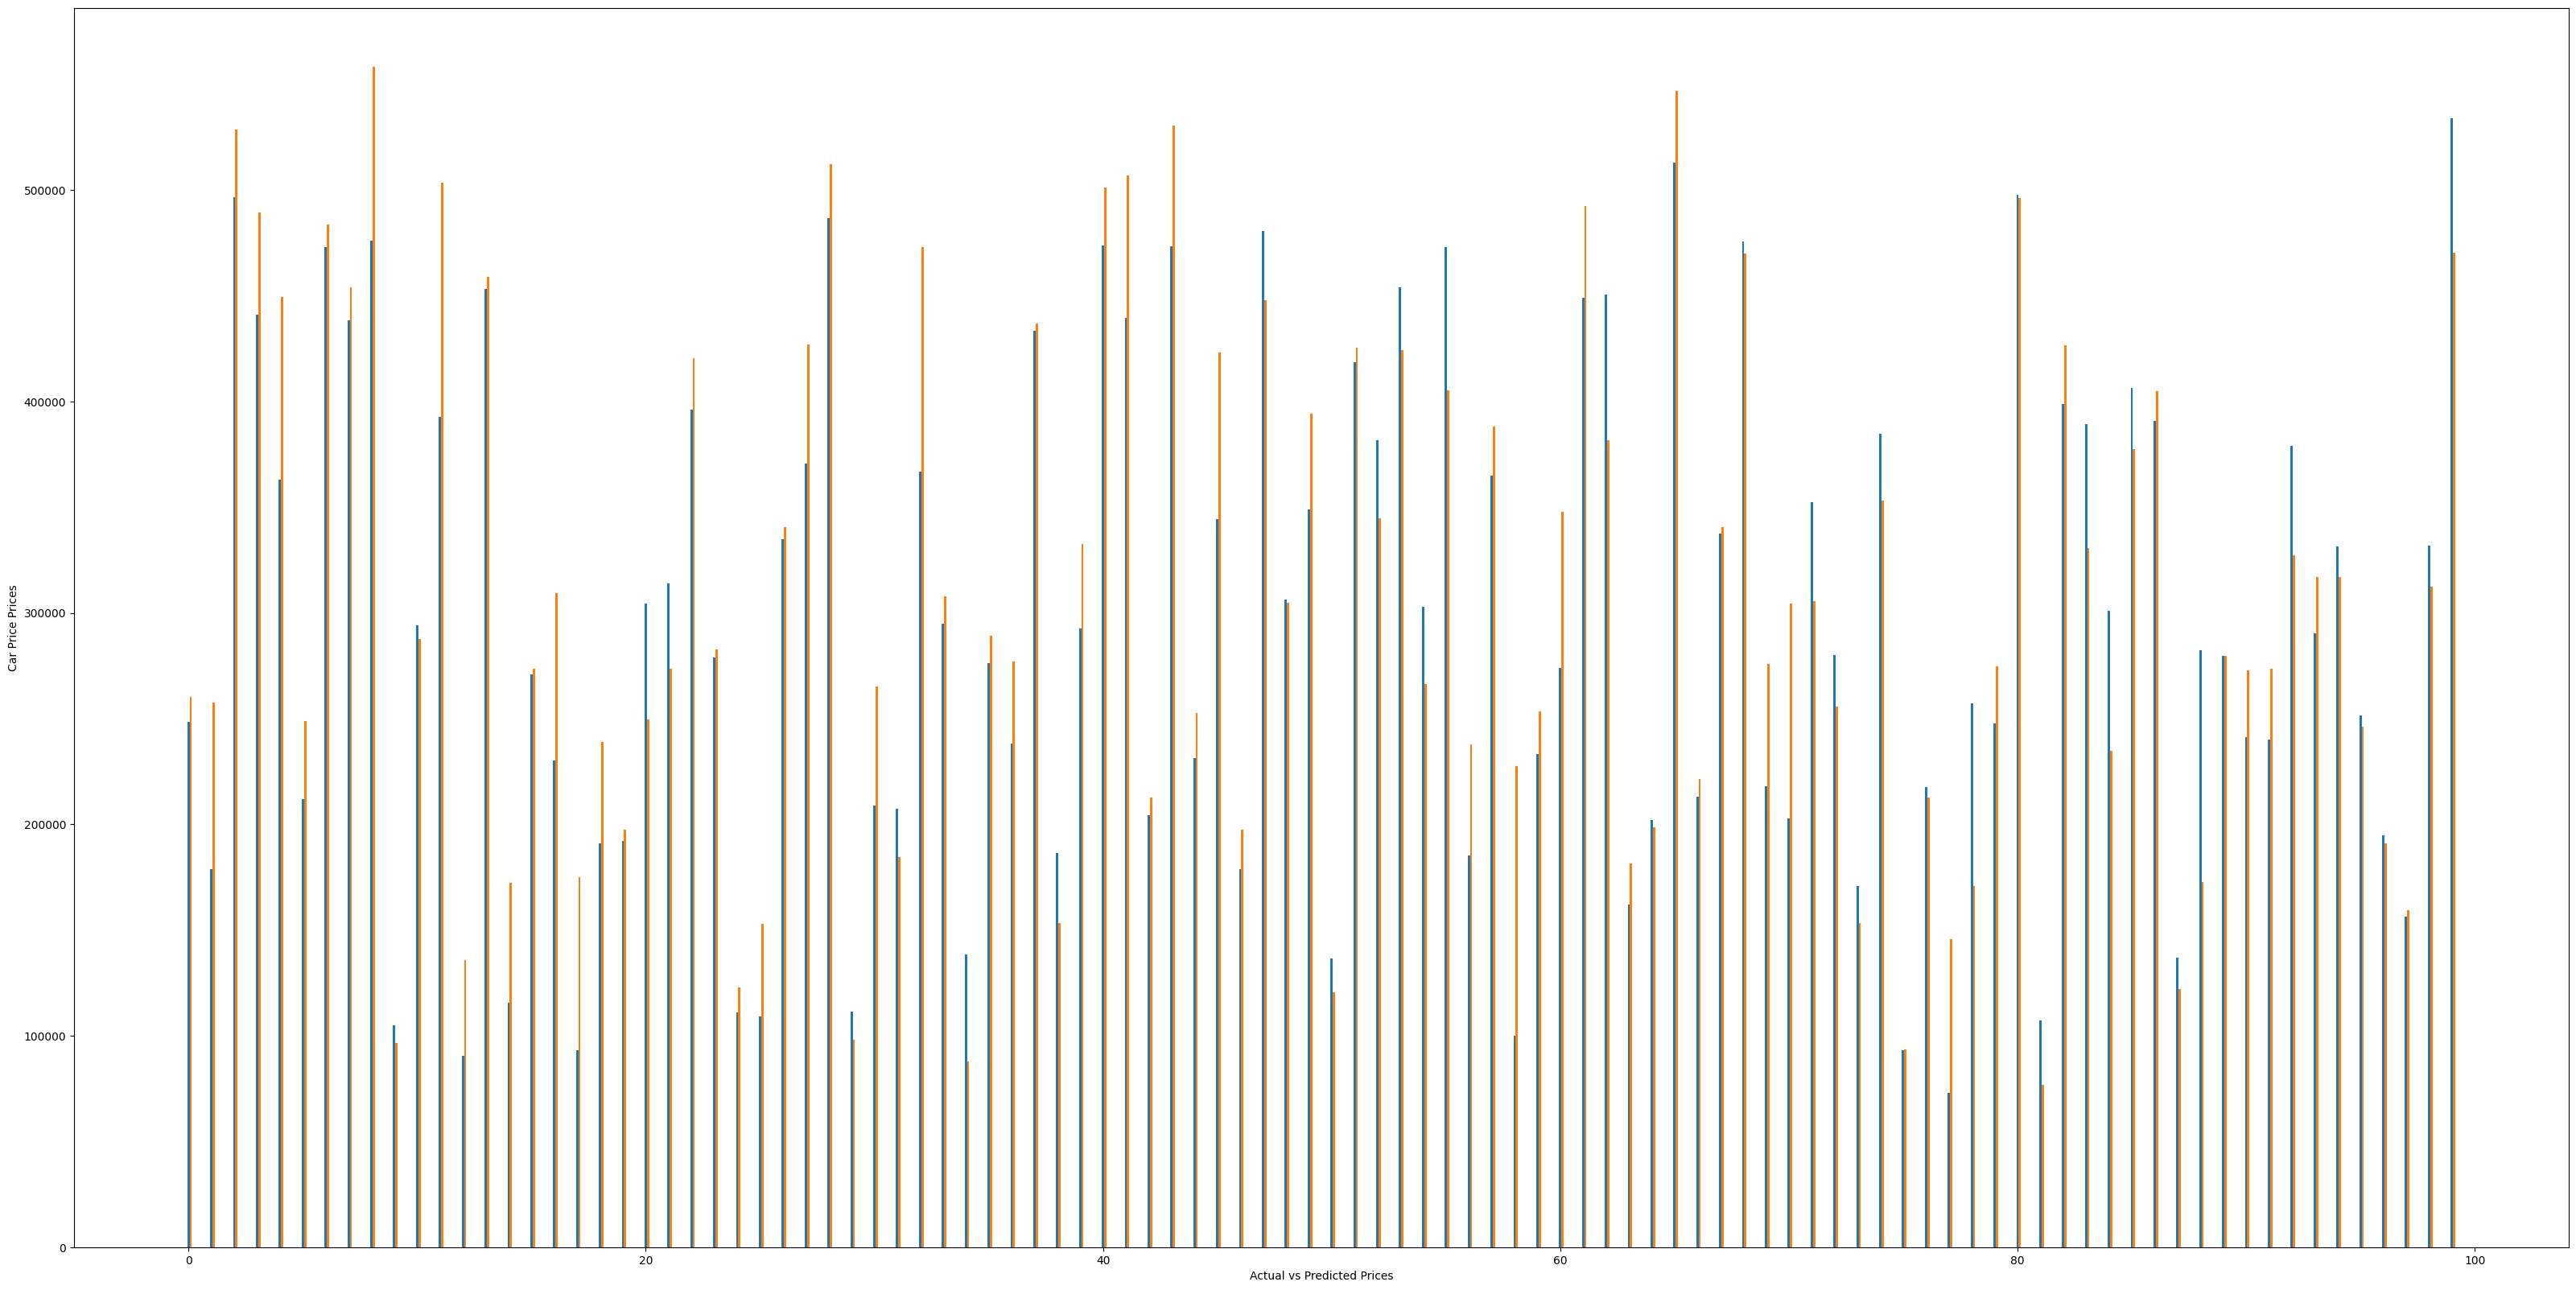

In [32]:
ind = np.arange(100)
plt.figure(figsize=(40,20))

width = 0.1

plt.bar(ind, y_pred, width, label='Predicted Car Price')
plt.bar(ind + width, y_true, width, label='Actual Car Price')

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Price Prices')

plt.show()